In [1]:
 import wandb
 import pandas as pd

 run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
 local_path = wandb.use_artifact("sample.csv:latest").file()
 df = pd.read_csv(local_path)

wandb: Currently logged in as: maria-vrana (maria-vrana-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/Users/VRANAM01/miniconda3/envs/mlflow-1b55bbb32fcebcf75056e6b31174a107c813a693/lib/python3.13/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


                                             |                               | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

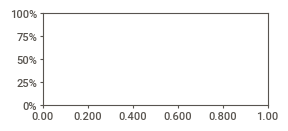

In [2]:
import sweetviz as sv

# Create the report
profile = sv.analyze(df)

# Display in Jupyter notebook
profile.show_notebook()